In [116]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [117]:
# import data
df = pd.read_csv('basic_project_timelines.csv')

In [118]:
df.dtypes

Proect Name    object
Size           object
Start Date     object
End Date       object
dtype: object

In [119]:
# Remove spaces from column names
df.columns = df.columns.str.replace(' ', '_')

# Convert to lowercase
df.columns = df.columns.str.lower()

In [120]:
# Convert date columns to datetime
date_columns = ['start_date', 'end_date']
for col in date_columns:
    df[col] = pd.to_datetime(df[col], format='%Y-%m-%d')

In [121]:
# Create column for the number of weeks between start and end dates
df['duration_weeks'] = (df['end_date'] - df['start_date']).dt.days / 7
df['duration_weeks'].describe()

count    21.000000
mean     19.829932
std      15.618841
min       0.428571
25%      11.571429
50%      13.142857
75%      22.428571
max      60.714286
Name: duration_weeks, dtype: float64

In [122]:
df

,proect_name,size,start_date,end_date,duration_weeks
0,ACF ML Shared Environment,M,2024-02-26,2024-07-08,19.000000
1,ANA Disbursement Model,XS,2024-03-19,2024-03-22,0.428571
2,Analyze USG AI Inventory,S,2024-05-20,2024-08-14,12.285714
3,NLP On GFE Testing,M,2024-05-20,2024-08-14,12.285714
4,OA Workforce Engagement Explanation,L,2024-03-11,2024-07-10,17.285714
5,OEA Outreach Lists,M,2024-03-04,2025-01-19,45.857143
6,OFA TANF Longitudinal Dataset,M,2024-07-08,2024-08-28,7.285714
7,OGM Grants Spending Trends,M,2024-03-04,2025-01-29,47.285714
8,OHSEPR TANF Service Delivery Data Scrapes,M,2024-08-26,2025-10-25,60.714286
9,OHS NPRM Comment Analysis,XL,2023-11-13,2024-01-19,9.571429


Text(0.5, 1.0, 'Project Duration by Size')

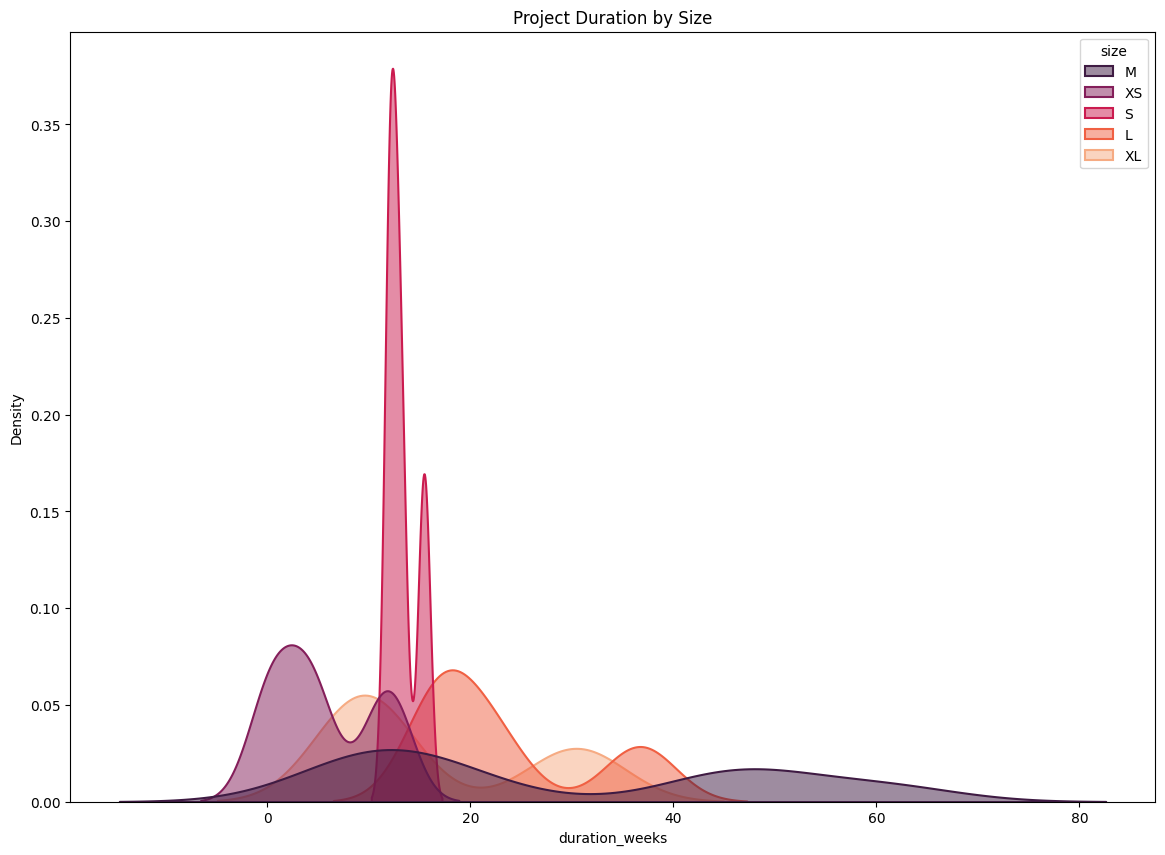

In [204]:
custom_order = ['XL', 'L', 'M', 'S', 'XS']
plt.figure(figsize=(14, 10))
palette = sns.color_palette("rocket", len(custom_order))

# Create KDE plots for each size category
sns.kdeplot(data=df, x='duration_weeks', hue='size', common_norm=False, palette=palette,
            fill=True, alpha=0.5, linewidth=1.5, bw_adjust=0.5)


plt.title('Project Duration by Size')

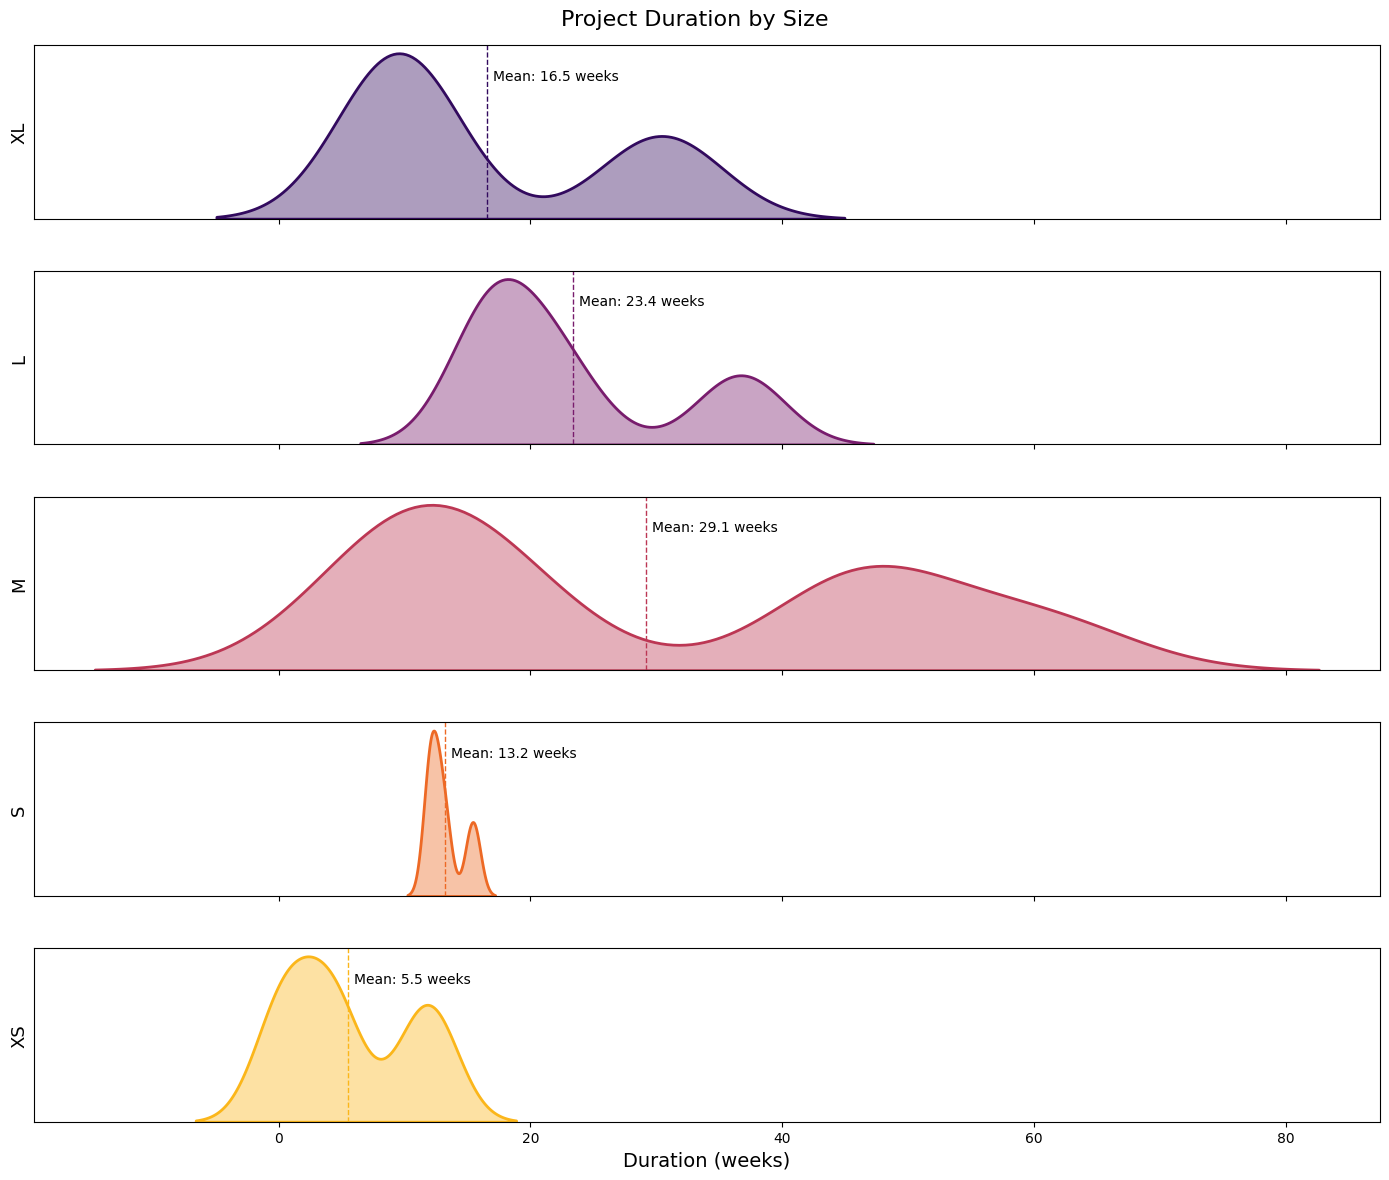

In [237]:
import matplotlib.pyplot as plt
import seaborn as sns

custom_order = ['XL', 'L', 'M', 'S', 'XS']
palette = sns.color_palette("inferno", len(custom_order))

# Create a figure with subplots for each size category
fig, axes = plt.subplots(len(custom_order), 1, figsize=(14, 12), sharex=True)

# Create separate KDE plots for each size in the custom order
for i, size in enumerate(custom_order):
    # Filter data for this size
    size_data = df[df['size'] == size]
    
    # Plot KDE on the corresponding subplot
    sns.kdeplot(data=size_data, x='duration_weeks', 
                color=palette[i], fill=True, alpha=0.4,
                linewidth=2, bw_adjust=0.5, ax=axes[i])
    
    # Add labels
    axes[i].set_ylabel(size, fontsize=13)
    axes[i].set_yticks([])  # Remove y-ticks since KDE y-axis values aren't meaningful here
    
    # Add a vertical line for the mean
    mean_duration = size_data['duration_weeks'].mean()
    axes[i].axvline(x=mean_duration, color=palette[i], linestyle='--', 
                   linewidth=1)
    axes[i].text(mean_duration + 0.5, axes[i].get_ylim()[1]*0.8, 
                f'Mean: {mean_duration:.1f} weeks', 
                #color=palette[i])
                color="black")

# Add overall title and labels
plt.suptitle('Project Duration by Size', fontsize=16, y=0.98)
plt.xlabel('Duration (weeks)', fontsize=14)
plt.tight_layout()
plt.subplots_adjust(hspace=0.3, top=0.95)  # Adjust spacing between plots
plt.show()

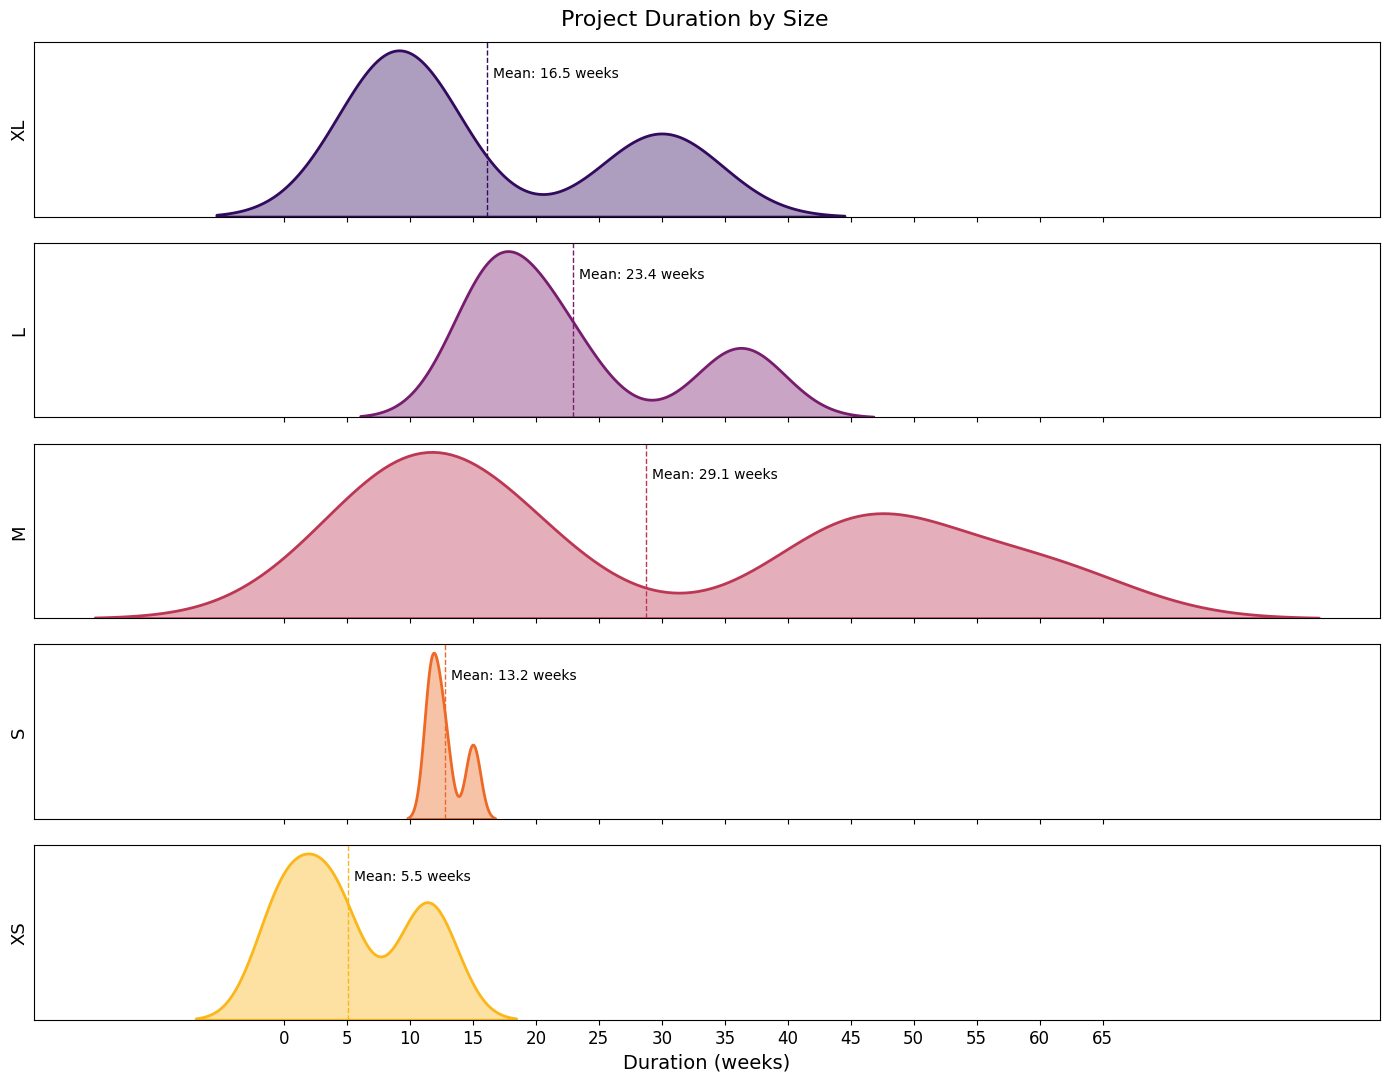

In [244]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

custom_order = ['XL', 'L', 'M', 'S', 'XS']
palette = sns.color_palette("inferno", len(custom_order))

# Create a figure with subplots for each size category
fig, axes = plt.subplots(len(custom_order), 1, figsize=(14, 11), sharex=True)

# Determine x-axis range
x_min, x_max = df['duration_weeks'].min(), df['duration_weeks'].max()

# Define x-axis ticks at 5-week intervals
tick_step = 5
x_ticks = np.arange(x_min, x_max + tick_step, tick_step)

# Create separate KDE plots for each size in the custom order
for i, size in enumerate(custom_order):
    size_data = df[df['size'] == size]
    
    sns.kdeplot(data=size_data, x='duration_weeks', 
                color=palette[i], fill=True, alpha=0.4,
                linewidth=2, bw_adjust=0.5, ax=axes[i])
    
    axes[i].set_ylabel(size, fontsize=13)
    axes[i].set_yticks([])  # Remove y-ticks for clarity
    
    mean_duration = size_data['duration_weeks'].mean()
    axes[i].axvline(x=mean_duration, color=palette[i], linestyle='--', linewidth=1)
    axes[i].text(mean_duration + 0.5, axes[i].get_ylim()[1] * 0.8, 
                 f'Mean: {mean_duration:.1f} weeks', color="black")

# Apply x-axis ticks every 5 weeks
axes[-1].set_xticks(x_ticks)
axes[-1].set_xticklabels([f"{tick:.0f}" for tick in x_ticks], fontsize=12)  # Format as integers

# Add overall title and labels
plt.suptitle('Project Duration by Size', fontsize=16, y=0.98)
plt.xlabel('Duration (weeks)', fontsize=14)
plt.tight_layout()
plt.subplots_adjust(hspace=0.15, top=0.95)
plt.show()
